# CDF (Cumulative Distribution Functions)

## NSFG Data

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [197]:
preg = pd.read_csv("./data/2002FemPreg_after_01.csv")
preg

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125,3.997283
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750,3.572040
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250,4.139030
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000,3.175147
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875,2.806603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875,2.806603
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000,3.401943


In [198]:
firsts, others = preg[(preg["pregordr"] == 1) & (preg["outcome"] == 1)], preg[(preg["pregordr"] != 1) & (preg["outcome"] == 1)]

In [ ]:
first_weights = firsts["totalwgt_kg"].dropna()
first_weights.mean()jjj

np.float64(3.278531474661661)

In [200]:
others_weights = others["totalwgt_kg"].dropna()
others_weights.mean()

np.float64(3.3250116930994342)

We see that in general, non-first children are much heavier than the first children. Let's investigate this, because using only the mean to make this assumption is risky.

Let's look at the PMFs first.

In [201]:
first_freq = first_weights.value_counts(normalize=True).sort_index()
first_freq

totalwgt_kg
0.141748    0.000300
0.283495    0.000300
0.453592    0.000300
0.481942    0.000300
0.566990    0.000300
              ...   
5.981749    0.001498
6.236895    0.000300
6.350293    0.000300
6.435342    0.000300
6.888934    0.000599
Name: proportion, Length: 162, dtype: float64

In [202]:
other_freq = others_weights.value_counts(normalize=True).sort_index()
other_freq

totalwgt_kg
0.056699    0.000174
0.198447    0.000174
0.255146    0.000174
0.283495    0.000174
0.425243    0.000174
              ...   
5.981749    0.002263
6.123497    0.000174
6.350293    0.000348
6.435342    0.001218
6.888934    0.000174
Name: proportion, Length: 175, dtype: float64

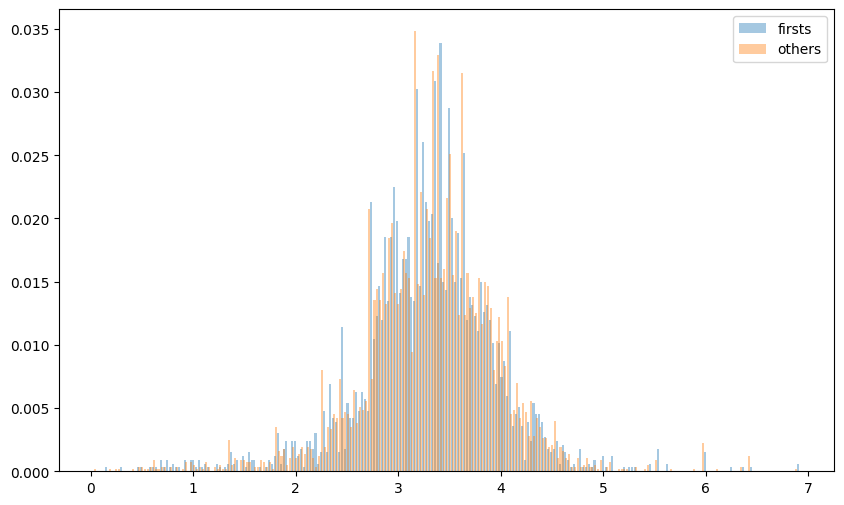

In [203]:
width = 0.02
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(first_freq.index + width / 2, first_freq, width=width, label="firsts", alpha=0.4)
ax.bar(other_freq.index - width / 2, other_freq, width=width, label="others", alpha=0.4)
ax.legend()
plt.show()

This is hard to look at. No conclusions, I just wanted to say it. We could bin them, but useful information would be gone too with the bins. 

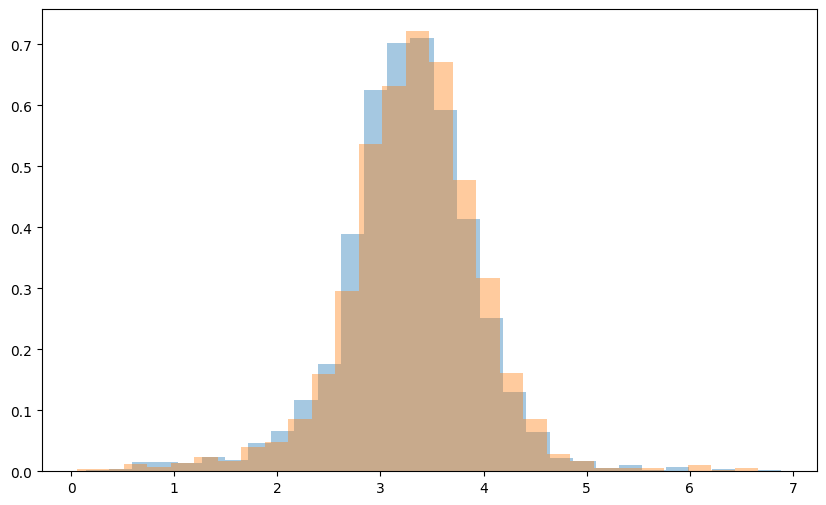

In [204]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(first_weights,bins=30, density=True, alpha=0.4)
ax.hist(others_weights,bins=30, density=True, alpha=0.4)
plt.show()

Okay it looks better, but as i said, we surely lost information while binning. And it is still hard to interpolate.

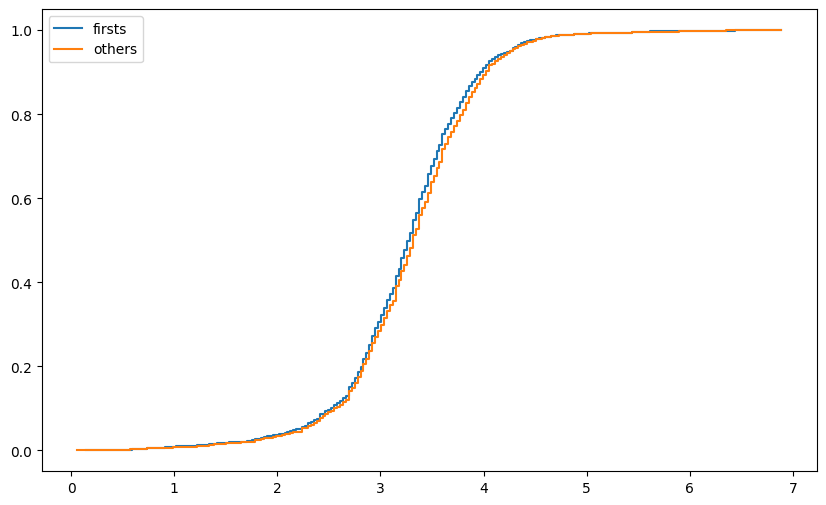

In [205]:
first_cdf = first_freq.cumsum()
others_cdf = other_freq.cumsum()

fig, ax = plt.subplots(figsize=(10,6))
ax.step(first_cdf.index, first_cdf, label="firsts")
ax.step(others_cdf.index, others_cdf, label="others")
ax.legend()
plt.show()

Curve of the first babies are to the left. Which means that first babies are slightly lighter through out the distribution.

## Percentile-Based Statistics

Let's investigate percentile based statistics, which are less sensitive to outliers.

In [206]:
from statadict import parse_stata_dict

In [207]:
stata_dict = parse_stata_dict('./data/2002FemPreg.dct')
preg = pd.read_fwf('./data/2002FemPreg.dat', names=stata_dict.names, colspecs=stata_dict.colspecs)
preg

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227


In [208]:
lb = preg["birthwgt_lb"]
oz = preg["birthwgt_oz"]

1 pound is 16 ounces, we assume that above values indicate missing data

In [209]:
oz_freq = oz.value_counts().sort_index()
oz_freq

birthwgt_oz
0.0     1037
1.0      408
2.0      603
3.0      533
4.0      525
5.0      535
6.0      709
7.0      501
8.0      756
9.0      505
10.0     475
11.0     557
12.0     555
13.0     487
14.0     475
15.0     378
97.0       1
98.0       1
99.0      46
Name: count, dtype: int64

Now, we can replace these invalid values. However, assuming that they will mostly go unnoticed, let's see how our statistics change.

In [210]:
lb_clean= lb.replace([51,97,98,99], np.nan)
oz_clean= oz.replace([97,98,99], np.nan)

In [211]:
total_weight_clean = lb_clean + (oz_clean / 16)
total_weight_invalid = lb + (oz / 16)
total_weight_clean = total_weight_clean.dropna()

Let's compute the mean and see the difference.

In [212]:
print(total_weight_clean.mean())
print(total_weight_invalid.mean())

7.265628457623368
7.319680587652691


Difference is very small, but remember, mean is only the first moment of this dataset. Let's compute the standard deviation.

In [213]:
print(total_weight_clean.std())
print(total_weight_invalid.std())

1.4082934455690173
2.096001779161835


Difference is getting larger. Let's compute the skewness which we learned eariler.

In [214]:
print(total_weight_clean.skew())
print(total_weight_invalid.skew())

-0.5896041274617897
22.255520104413325


If we only wanted to find the skewness, _invalid_ dataset would give us a completely wrong statistic, even the sign of the skewnes is wrong.

To start calculating with percentile-based statistics, we have to create a CDF first.

In [215]:
total_cdf = total_weight_invalid.value_counts(normalize=True).sort_index().cumsum()
total_cdf

0.1250      0.00011
0.3125      0.00022
0.4375      0.00033
0.5625      0.00044
0.6250      0.00066
             ...   
15.1875     0.99956
15.4375     0.99967
51.3750     0.99978
103.0625    0.99989
104.1250    1.00000
Name: proportion, Length: 190, dtype: float64

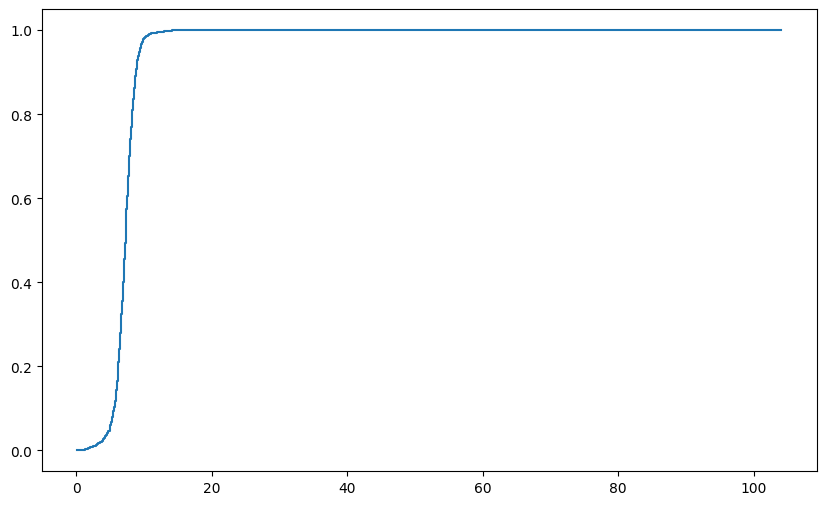

In [216]:
fig, ax = plt.subplots(figsize=(10,6))
ax.step(total_cdf.index, total_cdf, label="firsts")

In [ ]:
total_cdf_clean= total_weight_clean.value_counts(normalize=True).sort_index().cumsum()
total_cdf_clean

0.1250     0.000111
0.3125     0.000221
0.4375     0.000332
0.5625     0.000443
0.6250     0.000664
             ...   
13.0000    0.999336
13.5000    0.999447
13.7500    0.999557
14.0000    0.999889
15.4375    1.000000
Name: proportion, Length: 184, dtype: float64

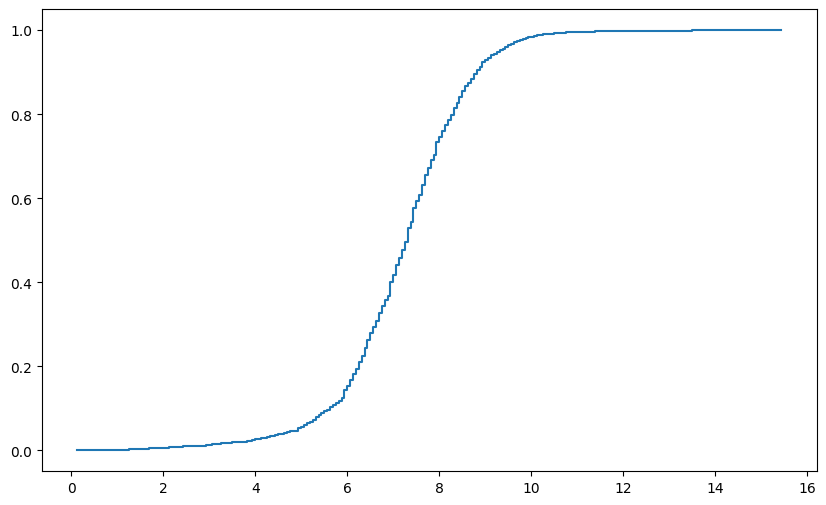

In [218]:
fig, ax = plt.subplots(figsize=(10,6))
ax.step(total_cdf_clean.index, total_cdf_clean, label="firsts")

Median is a percentile-based statistic. Let's compare the clean and invalid datasets.

In [219]:
total_weight_clean.median(), total_weight_invalid.median()

(np.float64(7.375), np.float64(7.375))

As you can see, median is much less sensitive to outliers. Let's find the IQR, the difference between 75th and 25th percentile.

In [224]:
total_iqr = total_cdf[total_cdf >= 0.75].index[0] - total_cdf[total_cdf >= 0.25].index[0]
total_iqr_clean = total_cdf_clean[total_cdf_clean >= 0.75].index[0] - total_cdf_clean[total_cdf_clean >= 0.25].index[0]
total_iqr, total_iqr_clean

(np.float64(1.625), np.float64(1.625))

In general, outliers have less effect on the IQR than the standard deviation.

We may ask, why are we comparing IQR with standard deviation:

We can categorize statistical calculations into two groups: moment-based statistics and percentile-based statistics. The mean is moment-based, while the median is percentile-based. The standard deviation is moment-based, while the IQR is percentile-based. There are also very handy calculations we can use if the distribution is Gaussian, but we will not delve into this topic for now.

We remember that skewness was very off using moment-based statistics. To find the percentile-based skewness, we use Bowley's Skewness formula.

$$
Skew = \frac{(Q_3 - Q_2) - (Q_2 - Q_1)}{Q_3 - Q_1}
$$

In [233]:
q1, q2, q3 = total_weight_invalid.quantile([0.25,0.5,0.75])
# c symbolizng clean
q1_c, q2_c, q3_c = total_weight_clean.quantile([0.25,0.5,0.75])

skew = ((q3-q2) - (q2-q1)) / (q3-q1)
skew_clean = ((q3_c-q2_c) - (q2_c-q1_c)) / (q3_c-q1_c)
skew, skew_clean

(-0.07692307692307693, -0.07692307692307693)

## Exercises

In [234]:
preg = pd.read_csv("./data/2002FemPreg_after_01.csv")
preg

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125,3.997283
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750,3.572040
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250,4.139030
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000,3.175147
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875,2.806603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875,2.806603
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000,3.401943


In [ ]:
male_wgt = preg[preg["babysex"] == 1]["totalwgt_kg"]
female_wgt = preg[preg["babysex"] == 2]["totalwgt_kg"]

(np.float64(3.3724976775987843), np.float64(3.2415023310826165))

Let's see the difference of birth weights between male and female babies. Using CDF.

In [248]:
male_cdf = male_wgt.value_counts(normalize=True).sort_index().cumsum()
female_cdf = female_wgt.value_counts(normalize=True).sort_index().cumsum()
male_cdf, female_cdf

(totalwgt_kg
 0.141748    0.000217
 0.198447    0.000434
 0.425243    0.000651
 0.453592    0.000868
 0.481942    0.001303
               ...   
 5.669905    0.996960
 5.981749    0.998697
 6.350293    0.999132
 6.435342    0.999783
 6.888934    1.000000
 Name: proportion, Length: 170, dtype: float64,
 totalwgt_kg
 0.056699    0.000223
 0.255146    0.000447
 0.283495    0.000893
 0.481942    0.001117
 0.510291    0.001564
               ...   
 6.123497    0.997990
 6.236895    0.998213
 6.350293    0.998436
 6.435342    0.999553
 6.888934    1.000000
 Name: proportion, Length: 170, dtype: float64)

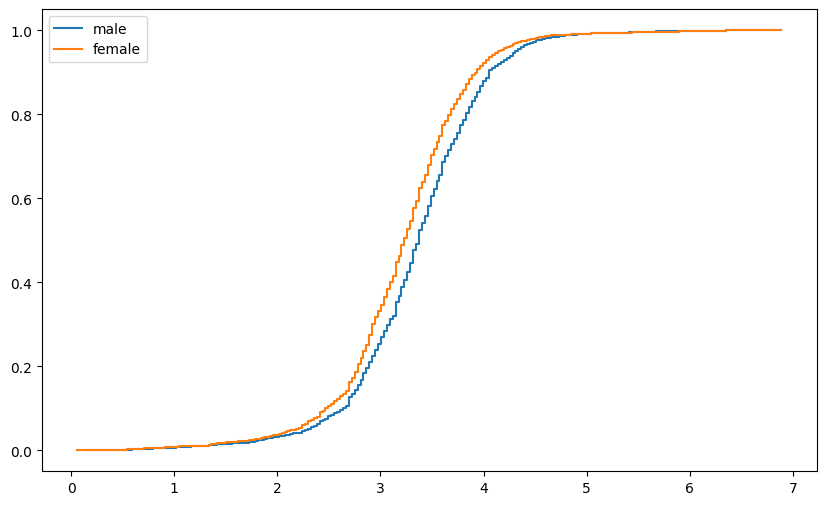

In [251]:
fig, ax = plt.subplots(figsize=(10,6))
ax.step(male_cdf.index, male_cdf, label="male")
ax.step(female_cdf.index, female_cdf, label="female")
ax.legend()
plt.show()

We can say that female babies are slightly lighter than male babies.

> Will continue.